# Introduction Unsupervised Learning

Unsupervised learning is a class of machine learning techniques for discovering patterns in data.

In supervised learning, our goal is to represent the target variable in the data set, and in doing so, we use variables other than the target variable.

<img src = "https://miro.medium.com/max/433/1*Iihw0V-r0raMMtcDTFGGQA.png" width = 500 heigth = 500></img>

In unsupervised learning, we have no target variables. Our goal is to find out which pattern fits when a data comes in that we are going to test. We have the two most common techniques when performing them. Apart from these, there are many more techniques;
- [KMeans](#0)
- [Hiararchical Clustering](#1)
- [t-SNE](#2)
- [PCA](#3)

Let's go into a little more detail.Let's imagine that we can give 3 different salaries to the employees of our company. We want to know which of these 3 salary value groups the newcomer will fall into. First of all, we do not have a target variable. Whether our data set is pre-employment information such as the working hours of the employees of the company, how long they have been with the company, the duration of their experience before entering the job or their graduation grades from the university. By looking at these values, we try to decide which of the 3 values his salary will be.

Let's use one of the unsupervised learning techniques, such as the KMeans algorithm, and train with the data we have. What will be the result?

Looking at the data, I will say that each observation consists of 3 salaries, that these are our classes, now I will say class. It will place it in our classrooms. We can visualize them much better with visualization tools. Since the data is grouped by classes, we make a prediction when a new person arrives and find out which class they belong to. Then we can now determine the salary of our employee.

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage ,dendrogram,fcluster

# t-SNE
from sklearn.manifold import TSNE

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## <a name="0">KMeans</a>

Traditional k-tools require only a few steps. The first step is to randomly select k centers, where k is equal to the number of sets you select. Centroids are data points that represent the center of a cluster.

The main element of the algorithm works through a two-step process called expectation-maximization. The Expectation step assigns each data point to the nearest center point. Next, the maximization step calculates the average of all points for each set and sets the new center of gravity.
The quality of cluster assignments is determined by calculating the sum of the [**squared error (SSE) after the centers have **merged** or matched the assignment of the previous iteration.**](https://en.wikipedia.org/wiki/Residual_sum_of_squares) SSE is defined as the sum of the square Euclidean distances to the nearest center point of each point. Since this is a measure of error, the purpose of the _k_ -tools is to try to minimize this value.

The following figure shows the centroids and SSE update through the first five iterations from two different runs of the _k_-means algorithm in the same dataset:

<img src = "https://files.realpython.com/media/centroids_iterations.247379590275.gif" width = 400 heigth = 400></img>

The purpose of this figure is to show that the initiation of centroids is an important step. It also highlights the use of SSE as a measure of clustering performance. After a series of sets and initial centers are selected, the expectation-maximization step is repeated until the center positions reach convergence and remain unchanged.

A random initialization step causes the _k_ -means algorithm to be **non-deterministic*; this means that if you run the same algorithm twice on the same dataset, the cluster assignments will change. Researchers typically run several initializations of the entire _k_-tool algorithm and select cluster assignments without initializing with the lowest SSE.

Now that we have an idea on the KMeans algorithm, let's move on to the application!

``make_blobs()`` is a convenience function in scikit-learn used to create synthetic sets.**make_blobs()** uses the following parameters:

- **'n_samples'**is the total number of instances to be created.
- **'centers** is the number of centers to be created.
- **'cluster_std'**is the standard deviation.

'make_blobs()' returns a bucket of two values:

1. A two-dimensional NumPy array with **x and y values** for each of the examples
2. A one-dimensional NumPy array containing the **cluster tags** for each instance

In [77]:
inputs , labels = make_blobs(n_samples=200,
                             centers = 3,
                             cluster_std = 2.75,
                             random_state = 42)

In [78]:
inputs[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [79]:
labels[:5]

array([1, 0, 2, 2, 2])

Our ``labels`` values ​​are our values ​​that we will not use in education. They are there to compare the estimates.

There are **true_labels** values ​​for each value in the ``inputs`` array.
- [ 9.77075874, 3.27621022] = 1
- [ -9.71349666, 11.27451802] = 0
* ...

Datasets often contain numerical features measured in different units, such as height (inches) and weight (pounds). A machine learning algorithm considers weight to be more important than height only because weight values ​​are larger and have higher variability from person to person. Machine learning algorithms need to consider all attributes on an even playing field. This means that the values ​​of all properties must be converted to the same scale.

The process of converting numeric features to use the same scale is known as feature scaling. It is an important data preprocessing step for most distance-based machine learning algorithms as it can have a significant impact on the performance of your algorithm. Examples of these algorithms can be KNN , LogisticRegression , SupporVectorMachines, ANN in supervised learning. In unsupervised learning, we can give an example of the KMeans algorithm.

In [80]:
scaled_inputs = normalize(inputs)

In [81]:
scaled_inputs[:5]

array([[ 0.94812023,  0.31791197],
       [-0.65271156,  0.75760651],
       [-0.5946269 , -0.80400177],
       [-0.71073635, -0.70345849],
       [-0.88191454, -0.47140932]])

Now the data is ready to cluster. The estimator class in scikit-learn is where you set algorithm parameters before fitting the 'KMeans' estimator to the data. The scikit-learn application is flexible and provides several parameters that can be adjusted. We will be talking about the most important parameter 'n_clusters', but if you want to examine the other parameters, you can look at [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [82]:
kmeans = KMeans(n_clusters = 3,
                n_init = 10,
                max_iter = 300,
                random_state = 42)

The parameter names match the language used earlier in the tutorial to define the k-means algorithm. Now that the k-means class is ready, the next step is to fit it into the data in it.

In [83]:
kmeans.fit(scaled_inputs)

KMeans(n_clusters=3, random_state=42)

When we want to get the **SSE** value I mentioned above, we will be using the 'inertia_' function.Now that we have chosen a 3-cluster structure, the result of the 3-cluster structure will return its value to us, and the lower this value, the better it will be for us.

In [84]:
kmeans.inertia_

23.869034631295328

Depending on the number of clusters we select, center points are assigned, and the function that gives them their position is ``cluster_centers_``.

In [85]:
kmeans.cluster_centers_

array([[-0.27558732,  0.91906063],
       [-0.66951788, -0.68776995],
       [ 0.8191204 ,  0.34336666]])

So far, we have chosen our own number of clusters and then adapted them to our data set. Well let's show the center points and sets.

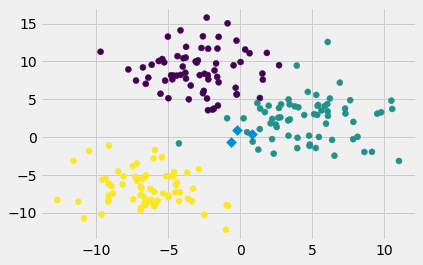

In [86]:
x = inputs[:,0]
y = inputs[:,1]

center_x = kmeans.cluster_centers_[:,0]
center_y = kmeans.cluster_centers_[:,1]

plt.scatter(x,y , c = labels)
plt.scatter(center_x , center_y , marker = 'D' , s = 50)
plt.show()

When we examine the graph, the blue dots show our center points. You can see the cluster colors separately from each other, but we can't say that a very good clustering takes place. This was because initially we only decided when choosing the number of clusters. One of the biggest disadvantages of the KMeans algorithm is that it asks you to choose the number of clusters. There is more than one method by which we select a set number. Let's talk about them !

#### Selecting the Appropriate Number of Clusters (K)

In this section, you'll look at two commonly used methods for evaluating an appropriate number of clusters:

- The Elbow Method
- The Silhouette Coefficient

Depending on the two methods shown above, the selection of the most optimal k value is carried out.

In [87]:
sse = []
num_clusters = range(2,11)

for k in num_clusters:
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    max_iter = 300,
                    random_state = 42)
    kmeans.fit(scaled_inputs)
    sse.append(kmeans.inertia_)
sse

[73.47271038335116,
 23.869034631295328,
 14.153728925148796,
 10.472713136515452,
 7.373914557106707,
 5.901152828327816,
 4.886682494340046,
 3.94030444080447,
 3.158740175543301]

We can see that as the number of clusters increases, our error value decreases. In such a case, will we always prefer the highest number of clusters? No, the **elbow method** is intervening here.

Our aim will be to select the number of clusters we see the elbow formation on the graph. For this, we will be giving the cluster numbers of the x-axis and the SSE values ​​of the y-axis by using the line plot.

In [88]:
elbow_df = pd.DataFrame({'num_clusters': num_clusters , 'sse' : sse})

In [89]:
elbow_df

,num_clusters,sse
0,2,73.472710
1,3,23.869035
2,4,14.153729
3,5,10.472713
4,6,7.373915
5,7,5.901153
6,8,4.886682
7,9,3.940304
8,10,3.158740


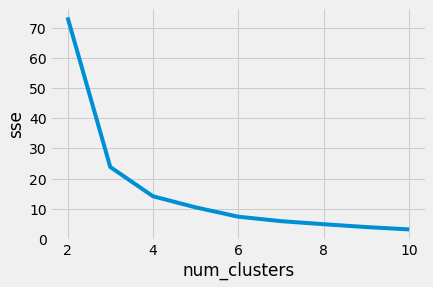

In [90]:
sns.lineplot('num_clusters' , 'sse' , data = elbow_df)
plt.show()

As the number of clusters increases, we can see that our error value decreases. In such a case, then will we always prefer the highest number of clusters? No, the **elbow method** intervenes here.

Our goal will be to select the number of clusters where we see elbow formation on the graph. For this, we will be using line plot to give the cluster numbers of the x axis and the SSE values of the y axis.

In [91]:
kl = KneeLocator(x = num_clusters ,  y = sse, curve="convex", direction="decreasing")

After creating the ``kl`` object, we can see the most appropriate k value with the ``elbow`` method.

In [92]:
kl.elbow

4

With the elbow method, we have completed the steps of reading over the graph and reaching the optimum value through the KneeLocator. It is necessary to determine the number of clusters by applying these operations first, and then to perform clustering operations depending on the number of clusters we obtain.

So let's move on to our two methods.**The Silhouette Coefficient** is a measure of cluster coherence and separation. It measures how well a data point fits into its assigned set based on two factors:

- How close the data point is to other points in the cluster
- How far the data point is from points in other clusters
Larger coefficient values indicate that sets of instances are closer to their clusters than to other sets.

In [93]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_inputs)
    pred = kmeans.labels_
    score = silhouette_score(scaled_inputs , pred)
    silhouette_coefficients.append(score)
    
silhouette_coefficients

[0.6162063945972879,
 0.7018475631182579,
 0.7051269428442449,
 0.6591302547737428,
 0.5677852567397352,
 0.5535510403864528,
 0.5502458411238079,
 0.5422190791460185,
 0.5043471937093794]

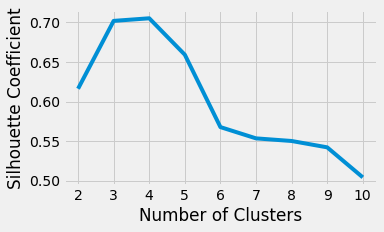

In [94]:
plt.figure(figsize=(5,3))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

While reading the graph in the Silhouette Coefficient method, the number of clusters with the highest coefficient value is the optimal number of clusters for us.

As a result, your decision on the number of clusters to use should be guided by a combination of domain information and clustering evaluation criteria.

## <a name="1"> Hierarchical Clustering</a>


As it is known, the k-center clustering method has a disadvantage. You need to determine the number of clusters in advance. Hierarchical clustering has been developed to eliminate this drawback. The basic logic of the hierarchical clustering algorithm is based on the combination of similar attributes or, on the contrary, their division. According to this working logic, there are two basic approaches as unifying and divisive. In the aggregative approach, also known as induction, initially all objects are separated from each other. In other words, each of the data in hand is considered as a separate set and the work begins. Then, clusters with similar attributes are combined to try to obtain a single set. In the deductive approach, a discriminatory strategy prevails in contrast to the induction method. In this approach, there is initially a single set. At each stage, according to the distance/similarity matrix, the objects are separated from the main set and different subsets are formed. As a result of the process, each data becomes a set.


<img src = "https://miro.medium.com/max/1039/0*afzanWwrDq9vd2g-" width = 500 heigth = 500></img>

In this section, we will be using the **linkage, fcluster and dendrogram** packages from the **scipy** library and the eurovision data set 2016.


In [23]:
eurovision = pd.read_csv('dataset/eurovision-2016.csv')

In [24]:
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [25]:
eurovision['Points Mean'] = eurovision.iloc[:,2:7].mean(axis = 1)

In [26]:
eurovision.drop(columns=['Jury A' ,'Jury B','Jury E' ,'Jury C' ,'Jury D', 'Jury Points','Televote Points'], inplace=True)

In [27]:
eurovision.head()

,From country,To country,Jury Rank,Televote Rank,Points Mean
0,Albania,Belgium,25,14,21.2
1,Albania,Czech Republic,22,22,20.0
2,Albania,The Netherlands,24,24,20.8
3,Albania,Azerbaijan,13,19,14.8
4,Albania,Hungary,10,10,10.6


First of all, our goal is to find a relationship between the countries and to include them in the clusters by creating the cluster structure. If we didn't use the clustering structure and wanted to do supervised learning, then each country would have a label for us, which would mean a lot of variables. Our model will be challenged to train. Instead, we'll be trying to get a pattern by creating clusters that multiple countries can enter.

In [28]:
classes = list(eurovision['From country'].unique())

Our variable ``classes`` will be a list of unique countries. This value will be the classes that are the first step of cluster formation in the graph we will show with the dendrogram.

In [29]:
X = eurovision[['Jury Rank','Televote Rank','Points Mean']][:42].values

The 'X' represents our data observations. We will be showing over 42 pieces of data so that there is not a very large dengdrogram drawing.

In [30]:
samples = linkage(X, method='ward')

``linkage`` is the process of combining with its function, that is, the process of revealing relationships.**It is the realization of hierarchical/agglomerative clustering.**
There is more than one joining method. The most popular of these are;
- **complete** takes the maximum values of the distance between sets.
- **single** takes the minimum value of the distance between sets.
- **average** averages the distance between sets.
- **ward** uses a ward variance minimization algorithm.

As a final step, we can perform dendrogram drawing.

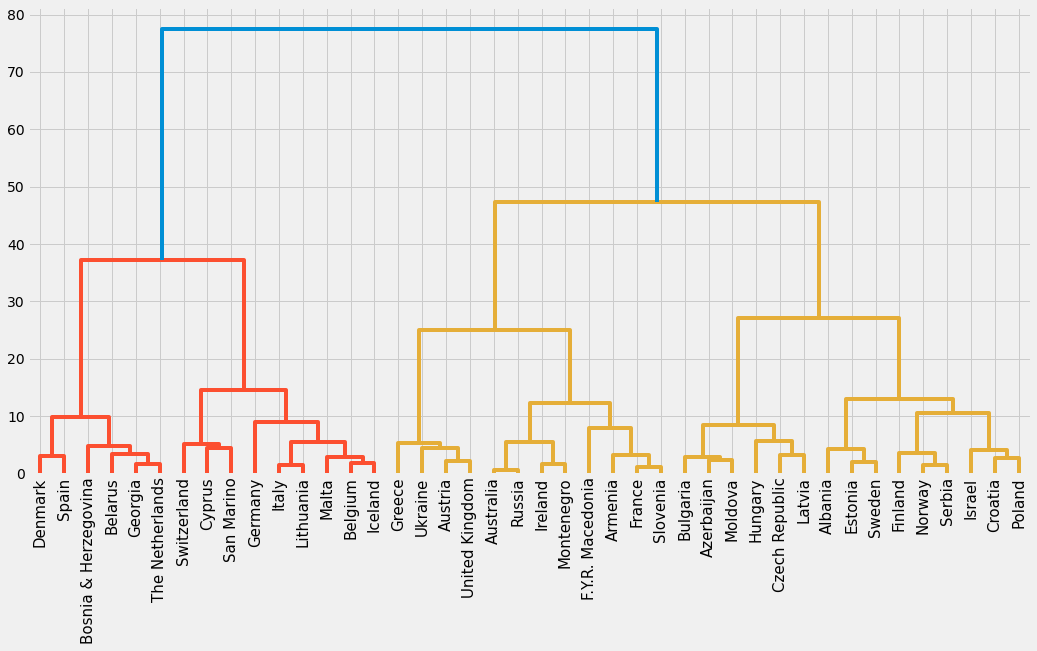

In [39]:
plt.figure(figsize=(16,8))
dendrogram(samples,
           labels=classes,
           leaf_font_size = 15,
           show_leaf_counts=True)
plt.show()

When we look at the graph, in the beginning all the countries were clusters for us, but as the relationships emerged, branching out and as you can see in the graph, they branch, and so on until there is a single cluster.

The y-axis of the chart is an important part. It shows the meases of the clusters and **is where we will use it for cluster selection.**

Based on the value on the y-axis that we select, it selects as many clusters as the largest number of branching points below it. If it is necessary to give an example;
- If the value of 50 is selected, 2 clusters will be formed.
- If the value of 20 is selected, 6 clusters will be formed.

we can say. So how are we going to choose this? In such a case, it is not enough just to look at the dendrogram graph. We may need to use the methods we see in the KMeans algorithm and look at the methods we will learn in the future. But one of the graphs that describes the best description of clustering is the dendrogram graph.

We can choose our number of clusters by looking at the graph, then we can label each country in our data set. For this, we will be using the 'fcluster' function.
- **Z** is the value you get from the linkage method.
- **t** is a threshold value. If we examine the y-axis you see in the graph and give it a 50, it will give us two labels [1,2] and map them to our classes, or you can get different results by giving other values.

If you want to review more parameters, you can reach [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html).

In [40]:
labels = fcluster(samples , t = 30,criterion='distance')

In [44]:
df = pd.DataFrame({'labels' : labels , 'classes': classes}).sort_values(by ='labels')

In [45]:
df

,labels,classes
12,1,Denmark
39,1,The Netherlands
5,1,Belarus
36,1,Spain
7,1,Bosnia & Herzegovina
17,1,Georgia
24,2,Italy
21,2,Iceland
33,2,San Marino
10,2,Cyprus


We have done the process of labeling the countries in our data set with the hierarchical clustering method. Let's imagine that a country comes from outside and we want to predict which label this country will be included in, this problem has turned into a supervised learning technique for us, and then we can easily predict this.

## <a name="2"> t-SNE</a>

t-SNE stands for 't-distributed stochastic neighbor placement'. It has a complex name but serves a very simple purpose. It maps samples from their high-dimensional space to a low-dimensional space so they can be visualized. While some distortion is unavoidable, t-SNE does a great job of approximating the distances between samples. Therefore, t-SNE is an invaluable visual aid for understanding a dataset.

<img src = "http://denovosoftware.com/wp-content/uploads/tsne_new.png" width = 500 heigth = 500></img>

Let's try to understand the logic of t-SNE by creating a synthetic data set.

In [95]:
features, labels = make_blobs(n_samples=200,
                              n_features=4 , 
                              random_state=50)

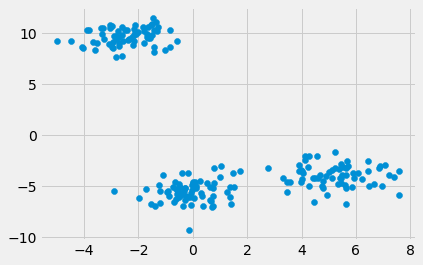

In [96]:
xs = features[:,0]
ys = features[:,1]

plt.scatter(xs , ys)
plt.show()

**t-SNE** library can be accessed from the 'sklearn.manifold'. TSNE is an important parameter learning_rate. Different rates need to be specified on different data sets.

- As we change the learning_rate rates, we can see that the location and distribution of the clusters also change.
- Another thing that can be said about t-SNE is that the axes cannot be interpreted.
The learning_rate rate can usually be given between [50,200] or [10,1000].

Let's use t-SNE and Hierarchical Clustering operations on another data set.

In [98]:
tsne = TSNE(learning_rate = 50)

After TSNE is formed, t-SNE has two methods. These are **fit** and **fit_transform** methods.

In [100]:
transformed = tsne.fit_transform(features)

In [102]:
transformed.shape

(200, 2)

When we look at its size, we can see that it has been reduced from a 4-dimensional structure to a 2-dimensional structure. This means that I will present the information I will receive from four variables to two variables.

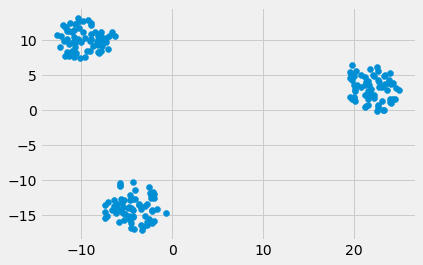

In [103]:
transformed_x = transformed[:,0]
transformed_y = transformed[:,1]

plt.scatter(transformed_x , transformed_y)
plt.show()

In fact, we can see that there is not much difference between the graph we created at the beginning and the current graph, but it seems as if the data has moved a little closer and collected. This is actually due to the fact that the t-SNE algorithm now makes sense of the data through two variables.

Imagine that you have more than 50 variables in your hand and you create it on the chart. You can imagine how messy the graph is and too complex to make sense of.In such a case, it would be very useful to look at t-SNE. After reducing the data, you can analyze how many different groups are formed and draw the path accordingly.t-SNE may not be enough to create a cluster, but it is very useful to understand the structure in the data set.

So let's continue with a different data set and use the t-SNE algorithms with the Hierarchical Set.

In [104]:
movements = pd.read_csv('dataset/movements.csv')

In [105]:
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [108]:
movements.rename(columns={'Unnamed: 0' : 'companies'} , inplace=True)

In [109]:
movements.head()

,companies,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


Vaow! We are facing a data set with 964 variables. First, let's try to see something by trying to show the data set on the chart.

In [110]:
movements['companies'].unique()

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

When we examine our data set, we have 964 variables and we need to make sense of these variables and make a clustering process.
- Our clusters will be according to companies. For example, Toyota and Ford can be a cluster because they are both car companies and we will be extracting this relationship from the data.

In [185]:
companies = list(movements['companies'].unique())

In [120]:
data = movements.iloc[:,1:].values

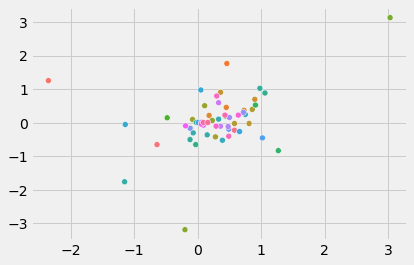

In [128]:
x = data[:,0]
y = data[:,1]

sns.scatterplot(x, y, hue = classes)
plt.legend([],[], frameon=False)
plt.show()

I'm trying to find a meaning by choosing only two variables, or I can try different combinations of variables, but it seems like I can't reach a result. In such a case, if we use t-SNE, we can both reduce the variables and start to make sense.

First of all, I will be applying the normalization process, which is one of our golden rules.

In [129]:
norm_data = normalize(data)

In [180]:
tsne = TSNE(learning_rate = 50)

As you increase the number of **learning_rate**, you'll see it get closer to each other as it is given. If you want the relationship to be less clustered instead of multi-cluster, the value can be increased learning_rate, but in our current data set, we will be making a distinction according to the types of companies, which shows that there will be quite a number of clusters. That's why I choose a lower learning_rate value. You can examine the charts by changing the value of the learning_rate.

In [181]:
transformed_data = tsne.fit_transform(norm_data)

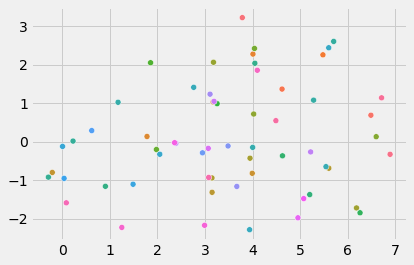

In [186]:
xs = transformed_data[:,0]
ys = transformed_data[:,1]

sns.scatterplot(xs , ys , hue = companies)
plt.legend([],[], frameon=False)
plt.show()

When you examine the graph, I seem to hear what I have to make of it:) But we can see some friendly data, which is a good sign. Let's go ahead and do a different graphical representation.

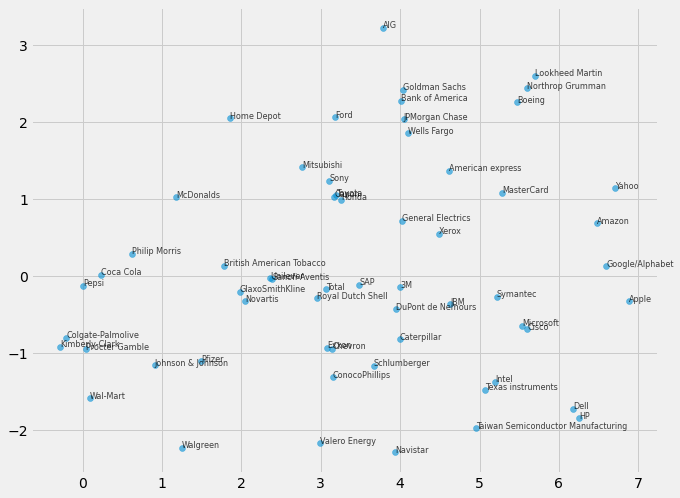

In [187]:
plt.figure(figsize=(10,8))
plt.scatter(xs , ys,alpha=0.6)
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)
plt.show()

When we look at the values that are close to each other, they are actually very relevant companies. We can say that we have created a relationship that is not bad.

Now let's try to make it look a little better by doing it with the hierarchical set, which I think is supported by t-SNE.

In [232]:
mergens = linkage(transformed_data , method='ward')

With t-SNE, I will be trying to show the reduced data set on the dendrogram by giving it to the linkage method.

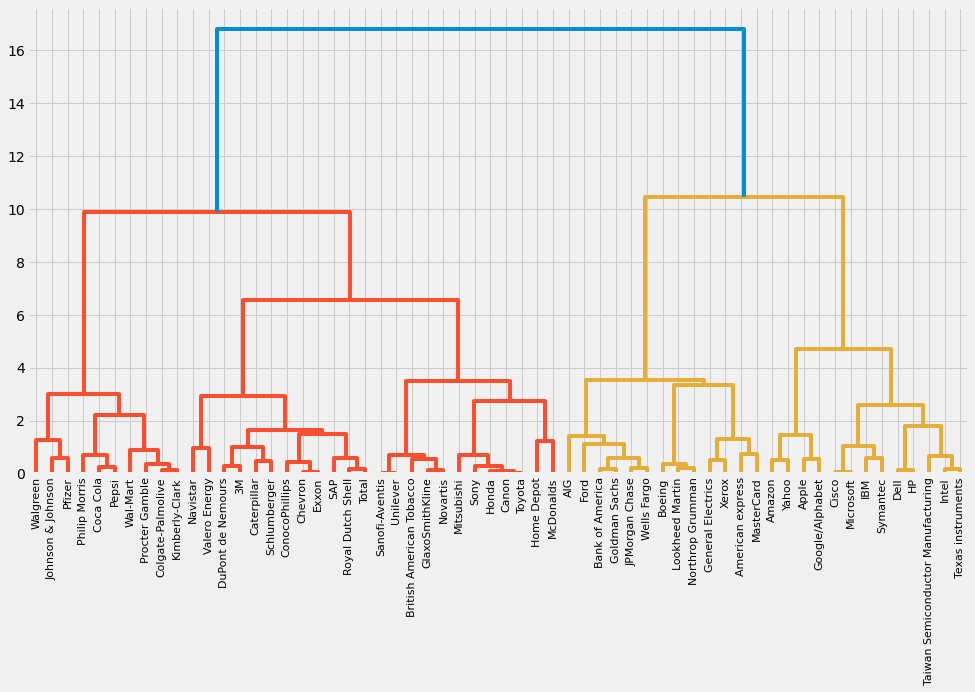

In [233]:
plt.figure(figsize=(15,8))
dendrogram(mergens, labels = companies,leaf_font_size=11)
plt.show()

When we examine it through the Dendrogram graph, we can see that car companies are grouped in the same way that technology companies are grouped to a not bad extent.

In [234]:
company_labels = fcluster(mergens , t = 2 , criterion= 'distance')

In [239]:
df = pd.DataFrame({'labels' : company_labels , 'companies' : companies}).sort_values(by = 'labels')

In [240]:
df

,labels,companies
25,1,Johnson & Johnson
39,1,Pfizer
54,1,Walgreen
28,2,Coca Cola
41,2,Philip Morris
38,2,Pepsi
56,3,Wal-Mart
27,3,Kimberly-Clark
40,3,Procter Gamble
9,3,Colgate-Palmolive


I wanted to see what kind of clustering occurs by choosing my threshold value (t) 2, and the result seems to be quite similar companies gathered together as you can see above.

## <a name="3">PCA (Principal Compenent Analysis)</a>

PCA is a useful statistical technique used in the fields of recognition, classification, image compression. It is a technique whose main purpose is to keep the data set with the highest variance in high-dimensional data, but to provide dimension reduction while doing so. It finds general properties in oversized data to reduce the number of sizes and compress the data. It is certain that some properties will be lost with the reduction in size; but the intent is that these lost traits contain little information about the population. This method combines highly correlated variables to create a smaller set of artificial variables, called 'key components,' that make up the most variation in the data.

PCA is a very effective method of revealing the necessary information in the data. The basic logic behind PCA is to represent a multidimensional data with a smaller number of variables by capturing the basic characteristics in the data.

In order to make PCA on our data set, we need to call the PCA method from the sklearn library.

In [243]:
df = pd.read_csv('dataset/Iris.csv')

In [244]:
df.drop('Id', axis = 1 ,inplace=True)

In [245]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [246]:
X = df.iloc[:,0:4]
y = LabelEncoder().fit_transform(df['Species'])

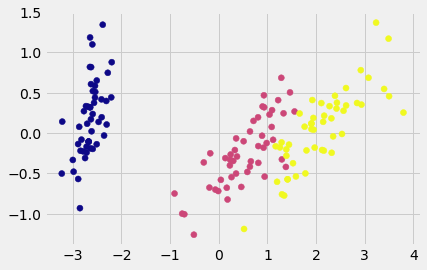

In [247]:
pca = PCA(n_components=2)

# fit_transform
x_pca = pca.fit_transform(X)

# xs : firs columns , ys : second columns
xs = x_pca[:,0]
ys = x_pca[:,1]


plt.scatter(xs, ys,c = y ,cmap='plasma')
plt.show()

First of all, we start with calling the PCA object. The PCA object takes the very important parameter **'n_components'**. This parameter is the parameter by which we determine how many dimensions we will reduce. We select 2 for this data set, but there are some methods for selecting n_components value, and we'll be talking about that method later.

The PCA object has two methods.
- fit performs the learning process with data.
- fit_transform both learns and applies the transformation on the data set or applies it on the variable we equalize.

Since we have chosen the value 2, the result will be two-dimensional and ``x_pca[:,0]`` represents the x axis and ``x_pca[:,1]`` is represented by the y axis. After defining these values, we can visualize them through the scatter plot.

After specifying the x and y axis in the scatter plot, we can see the color painting by specifying our ethics numerically on the 'c' parameter and the clustering structure with 2 variables.


### Number of Components

Think of this dataset with 2 characteristics: latitude and longitude. These two features can track the flight of an aircraft, for example. This dataset is 2-dimensional, but it turns out that it can be predicted closely using a single feature: displacement along the flight path. This dataset is essentially one-dimensional.

The intrinsic size of a dataset is the number of properties required to approach it. The intrinsic dimension informs about dimension reduction because it tells us how much a dataset can be compressed.
**PCA(n_components)** It is very important to select the n_components value in PCA application.
- n_components asks how many variables to reduce our total number of variables to. So the inner dimension is the parameter we give, diyebiliriz.n_components there are multiple methods to find its value, and we'll be looking at some of them.

- Specifying the number to be reduced by specifying variance, when we extend our data set to a certain variable, the variables have variance. The higher this value, the more meaning that variable means.Let's consider a reduction with 3 variables.Let the variables 'PCA1', 'PCA1' and 'PCA3'. Let's assume that the variant PCA1 has a variance of 0.55, while PCA2 has a value of 0.50 and PCA3 has a value of 0.5.The first variable has very high values, but it would be more accurate to choose 2 variables instead of a 3-variable structure with a very low variance. Because the 3rd variable has little to no effect on the data set.**These values do not only take between 0-1, they are the high differences between them that we need to look at.**

**n_components** value can specify what kind of variance should be by giving float values from 0 to 1.'0.95-0.99' are usually given values.

We can use the ``pca.explained_variance_``method to see the variance of the variables.

In [248]:
variances = pca.explained_variance_
variances

array([4.22484077, 0.24224357])

We can examine the results by giving more value to the variance values resulting from the reduction to 2 variables.

In [249]:
pca.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [250]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Let's show the variance of variables on the barplot.

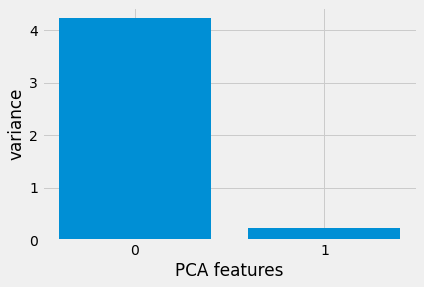

In [251]:
features = range(pca.n_components_)
variances = pca.explained_variance_

plt.bar(features, variances)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
plt.show()

Performing a two-variable reduction seems appropriate for this data set.When we try with 3 variables, the variance of the 3rd variable will be lower and 1 variable reduction is not done on the PCA.

**n_components** It is much more recommended to give variance rather than manually selecting it.

**THANK YOU FOR READING SO FAR.I WANTED TO TOUCH ON THE MOST COMMON CLUSTERING TECHNIQUES.I AM SURE THERE HAVE BEEN PLACES WHERE I HAVE DONE WRONG I WOULD BE VERY HAPPY IF YOU COULD POINT THIS OUT.I WISH EVERYONE GOOD WORK**